In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from langdetect import detect

In [2]:
# Load data
data = pd.read_csv('../Dataset_Original/UTK/train.csv')

# Data overview

In [3]:
# Data exploration
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data['author'], _ = pd.factorize(data['author'])
correlation = data[['author', 'label']].corr()
print(correlation)

          author     label
author  1.000000 -0.047077
label  -0.047077  1.000000


We can see that the correlation between the author and the label is near -0.05, which means that there is no correlation between the author and the label.

In [5]:
data = data.drop('author', axis=1)
data = data.drop('id', axis=1)

In [6]:
print(data['label'].value_counts())

label
1    10413
0    10387
Name: count, dtype: int64


# Missing & duplicate values

In [7]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [8]:
# Number of unique values in title
num_unique_values = data['title'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

19803/20800


In [9]:
# Number of unique values in text
num_unique_values = data['text'].nunique()
print(f'{num_unique_values}/{data.shape[0]}')

20386/20800


# Distribution of title length

In [10]:
data = data.dropna(subset=['title'])

In [11]:
data['title_length'] = data['title'].apply(len)
print(data['title_length'].describe())

count    20242.000000
mean        74.319336
std         23.161910
min          3.000000
25%         60.000000
50%         75.000000
75%         88.000000
max        456.000000
Name: title_length, dtype: float64


In [12]:
print(data[data['title_length']==3]['title'])
print(data[data['title_length']==3]['text'])

15728    Rum
Name: title, dtype: object
15728    RIGHT REVERAND POPE JEREMIAH GOLDSTIEN says: \...
Name: text, dtype: object


In [13]:
print(data[data['title_length']==456]['title'])
print(data[data['title_length']==456]['text'])

1173    Roger Stone update on Stop the Steal exit poll...
Name: title, dtype: object
1173    \nRoger Stone: Hillary Plans to Steal Election...
Name: text, dtype: object


# Distribution of news length

In [14]:
data = data.dropna(subset=['text'])

In [15]:
data['text_length'] = data['text'].apply(len)
print(data['text_length'].describe())

count     20203.000000
mean       4668.044251
std        5151.439764
min           1.000000
25%        1747.000000
50%        3495.000000
75%        6364.000000
max      142961.000000
Name: text_length, dtype: float64


In [16]:
# Describe 'text_length' for label 0
print(data[data['label'] == 0]['text_length'].describe())
# Describe 'text_length' for label 1
print(data[data['label'] == 1]['text_length'].describe())

count    10387.000000
mean      5214.130452
std       4313.791236
min          3.000000
25%       2397.000000
50%       4591.000000
75%       7015.000000
max      85948.000000
Name: text_length, dtype: float64
count      9816.000000
mean       4090.192033
std        5854.937093
min           1.000000
25%        1219.000000
50%        2534.500000
75%        5021.500000
max      142961.000000
Name: text_length, dtype: float64


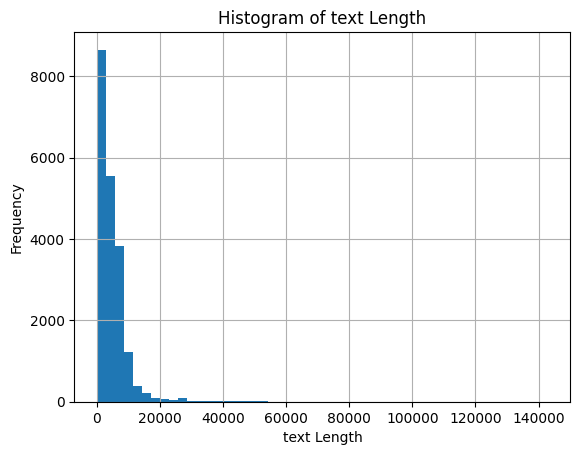

In [17]:
data['text_length'].hist(bins=50)
plt.title('Histogram of text Length')
plt.xlabel('text Length')
plt.ylabel('Frequency')
plt.show()

## Below 10 characters

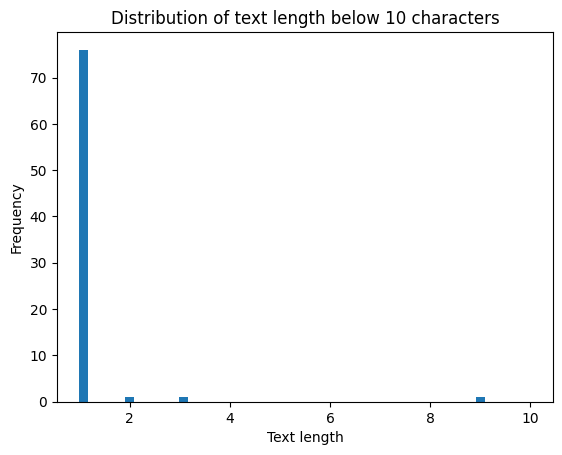

In [18]:
plt.hist(data['text_length'], bins=50, range=[1, 10])
plt.title('Distribution of text length below 10 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [19]:
print(data[data['text_length']<10]['text'])

82        
169       
295       
470       
592       
        ..
19929     
20141     
20242     
20264     
20513     
Name: text, Length: 79, dtype: object


In [20]:
print(data['text'].loc[20513]) #không có gì

## From 10 to 100 characters

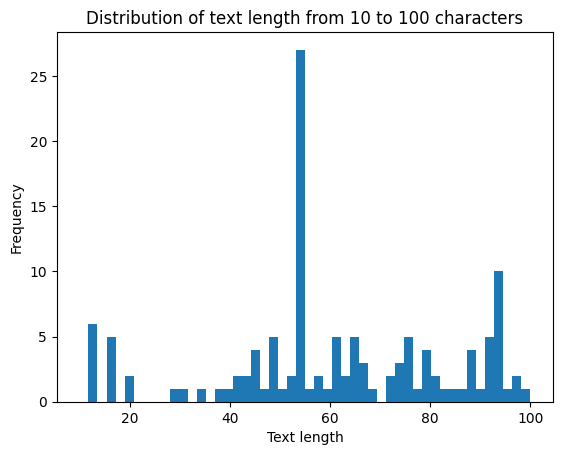

In [21]:
plt.hist(data['text_length'], bins=50, range=[10, 100])
plt.title('Distribution of text length from 10 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [22]:
filtered_data = data.loc[data['text_length'] == 54, ['text', 'label']]

# In ra nội dung của cột 'text' và 'label'
print(filtered_data)

                                                    text  label
519    source Add To The Conversation Using Facebook ...      1
2089   Support Us The Arrivals Bosanski Prijevod 13-l...      1
3206   source Add To The Conversation Using Facebook ...      1
4726   source Add To The Conversation Using Facebook ...      1
4781   source Add To The Conversation Using Facebook ...      1
5052   source Add To The Conversation Using Facebook ...      1
5539   source Add To The Conversation Using Facebook ...      1
6891   source Add To The Conversation Using Facebook ...      1
7055   source Add To The Conversation Using Facebook ...      1
7628   source Add To The Conversation Using Facebook ...      1
7946   source Add To The Conversation Using Facebook ...      1
8386   source Add To The Conversation Using Facebook ...      1
8594   source Add To The Conversation Using Facebook ...      1
10095  source Add To The Conversation Using Facebook ...      1
10343  source Add To The Conversation Us

In [23]:
print(data['text'].loc[17354])

source Add To The Conversation Using Facebook Comments


In [24]:
filtered_data = data.loc[data['text_length'] == 94, ['text', 'label']]

# In ra nội dung của cột 'text' và 'label'
print(filtered_data)

                                                    text  label
4565   Chart Of The Day: In Lieu Of Growth, The Tech ...      1
10604  Support Us Summer Planespotting at London Heat...      1
12975  Año 63: Cupido logra que le validen la aptitud...      1


In [25]:
print(data['text'].loc[12975])

Año 63: Cupido logra que le validen la aptitud “arquero” en Linkedin EFEMÉRIDES DE LA SEMANA  


## Above 100 characters

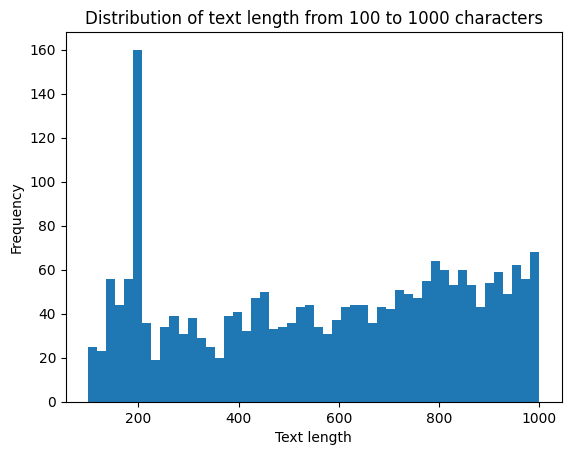

In [26]:
plt.hist(data['text_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [27]:
pd.set_option('display.max_rows', None)
filtered_data = data.loc[data['text_length'] == 199, ['text', 'label']]
filtered_data_count = filtered_data.shape[0]

print('Count:', filtered_data_count)
print(filtered_data)


Count: 17
                                                    text  label
434    By Brandon Turbeville As the floodwaters reced...      1
1614   By Matt Agorist Kansas City, MO — Every year, ...      1
1926   The political climate of the current U.S. elec...      1
2035   Malala Yousufzai is a remarkable young woman w...      1
2398   More and more studies on the abilities of THC ...      1
2568   This Detroit, Michigan woman’s tweet will be y...      1
4970   By Alice Salles The 2016 U.S. election shocked...      1
5256   Sabine El Gemayel, director and producer of Ge...      1
6132   Op-Ed by Paul A. Philips Ever wondered how Big...      1
6929   By Cassius Kamarampi and Brandon Turbeville (E...      1
9520   President Donald Trump was the primary target ...      0
9734   By Christina Sarich A newly opened lab can now...      1
11436  Next Swipe left/right Someone broke a Skype sp...      1
12517  By Claire Bernish, The Free Thought Project Fo...      1
14269  By Brandon Turbeville A

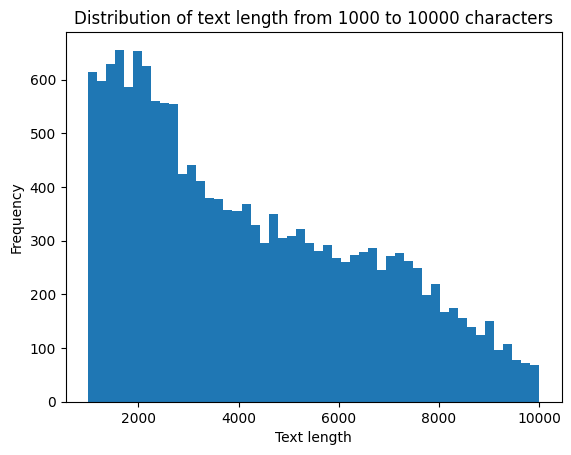

In [28]:
plt.hist(data['text_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

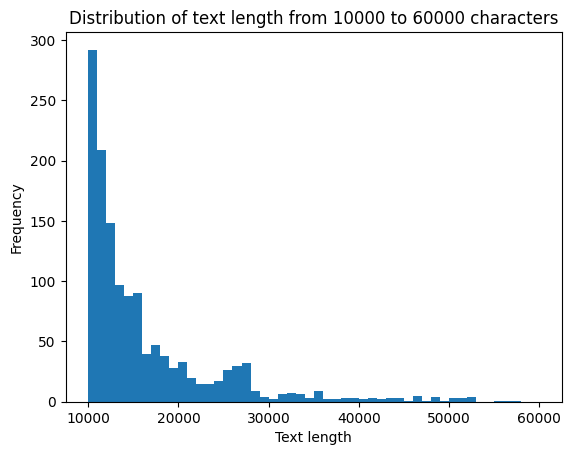

In [29]:
plt.hist(data['text_length'], bins=50, range=[10000, 60000])
plt.title('Distribution of text length from 10000 to 60000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

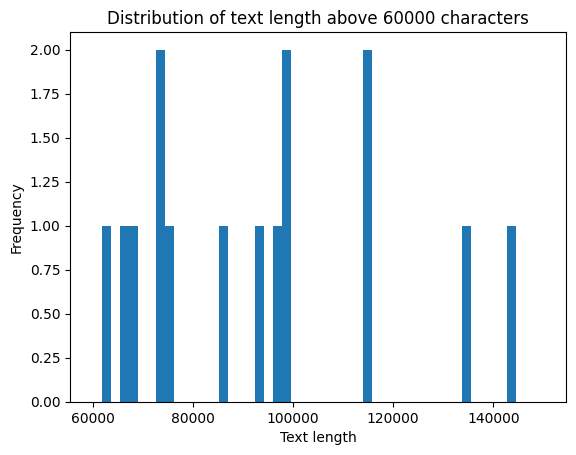

In [30]:
plt.hist(data['text_length'], bins=50, range=[60000, 150000])
plt.title('Distribution of text length above 60000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(data[data['text_length']>60000]['text'])

464      References The Debate \nIt started when Daniel...
502      Here is President Putin’s speech at Valdai Put...
2734     Why Is Obama Threatening Russia With World War...
5092     55 Reasons Why California Is The Worst State I...
7466       Camden, New Jersey: One Of Hundreds Of U.S. ...
7474     More Americans Than Ever Are Losing Their Reli...
7530     Why Are So Many People Choosing To Leave The U...
8719     How Many People Will Have To Migrate Out Of Ca...
10204    President Trump on Thursday announced his new ...
11628    Following is a transcript of   Donald J. Trump...
13533    The Hard Working American vs. The Government P...
13745    Late one Friday night in early November, Jun R...
14293    It Is Now Mathematically Impossible To Pay Off...
19031    Home / BREAKING NEWS / BREAKING: Officer Charg...
19764    Заседание Международного дискуссионного клуба ...
Name: text, dtype: object


## Some outliers

In [32]:
def not_english(text):
    try:
        return detect(text) != 'en'
    except:
        return False

not_english_examples = data[data['text'].apply(not_english)]
print(not_english_examples)

                                                   title  \
47     СМИ Сербии приписали россиянам "подготовку тер...   
173    Trump family already ‘sworn to secrecy’ about ...   
229    США—КНР: на кого возлагать ответственность за ...   
233    La expresión “no, lo siguiente” ya es la más u...   
257                                     Newsticker (974)   
261    Ya hay más reencuentros de “Operación Triunfo”...   
307    ¡Demoledor amparo contra Salgado, Keiko y 72 c...   
336    Las frases más destacadas del debate de invest...   
371    Путин рассказал, когда в Крыму решат проблему ...   
467         Nota conceptual para la presidencia de Rusia   
492    Казахстан на страже ядерной безопасности | Нов...   
499    أوروبا وخيار القوة في مواجهة اللاجئين - RT Arabic   
514       ЕС намерен расширить санкции в отношении Сирии   
547    Donald Trump, el primer presidente naranja de ...   
553    В МВД опровергли, что разыскивают 13-летнюю до...   
585               Компания Alibaba откры

## Text length and label correlation

In [33]:
correlation = data[['text_length', 'label']].corr()
print(correlation)

             text_length     label
text_length     1.000000 -0.109049
label          -0.109049  1.000000


In [34]:
# Filter the DataFrame for examples where the text below 100 characters
long_texts = data[data['text'].str.len() < 100]
# Get the label distribution
label_distribution = long_texts['label'].value_counts()
print(label_distribution)

label
1    202
0      2
Name: count, dtype: int64


In [35]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[(data['text'].str.len() >= 100) & (data['text'].str.len() <= 1000)]
# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    1739
0     532
Name: count, dtype: int64


In [36]:
# Filter the DataFrame for examples where the text exceeds 1000 characters
l_texts = data[(data['text'].str.len() >= 1000) & (data['text'].str.len() <= 10000)]

# Get the label distribution
label_distribution = l_texts['label'].value_counts()

print(label_distribution)

label
0    9207
1    7152
Name: count, dtype: int64


In [37]:
# Filter the DataFrame for examples where the text exceeds 10000 characters
long_texts = data[data['text'].str.len() > 10000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    727
0    647
Name: count, dtype: int64


In [38]:
# Filter the DataFrame for examples where the text exceeds 90000 characters
long_texts = data[data['text'].str.len() > 90000]

# Get the label distribution
label_distribution = long_texts['label'].value_counts()

print(label_distribution)

label
1    8
Name: count, dtype: int64


In [39]:
# Plot function
def plot_wordcloud(type):
    wordcloud = WordCloud(width=800, height=600,
                        background_color='white',
                        stopwords=None,
                        min_font_size=10).generate(type)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [40]:
# Chuyển đổi các giá trị thành chuỗi và nối lại
fake_title = ' '.join(filtered_data[filtered_data['label'] == 1]['title'].astype(str))
fake_text = ' '.join(filtered_data[filtered_data['label'] == 1]['text'].astype(str))
true_title = ' '.join(filtered_data[filtered_data['label'] == 0]['title'].astype(str))
true_text = ' '.join(filtered_data[filtered_data['label'] == 0]['text'].astype(str))


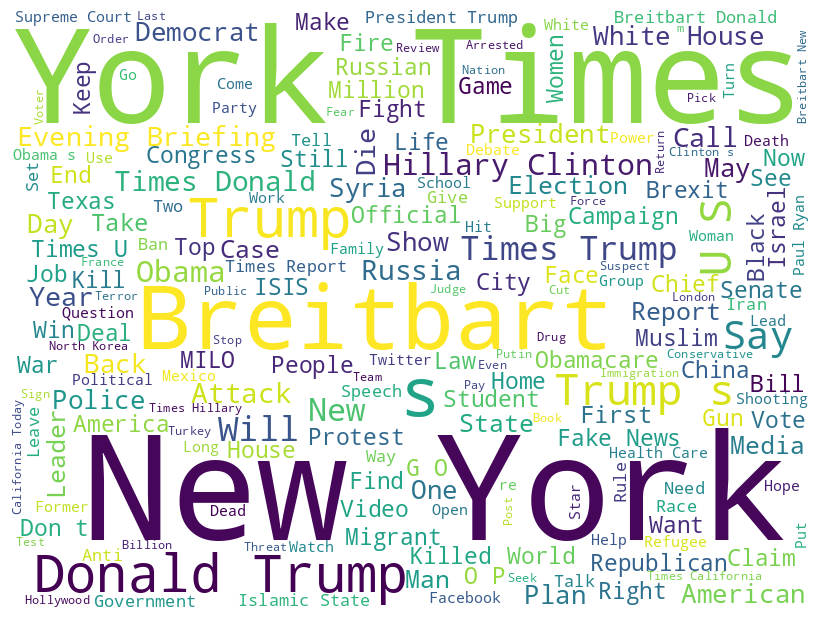

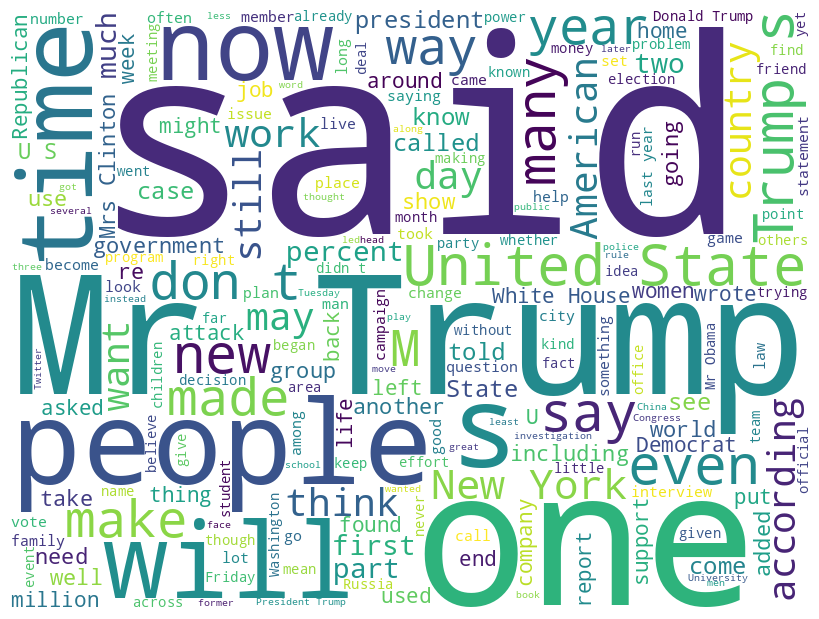

In [41]:
plot_wordcloud(true_title)
plot_wordcloud(true_text)

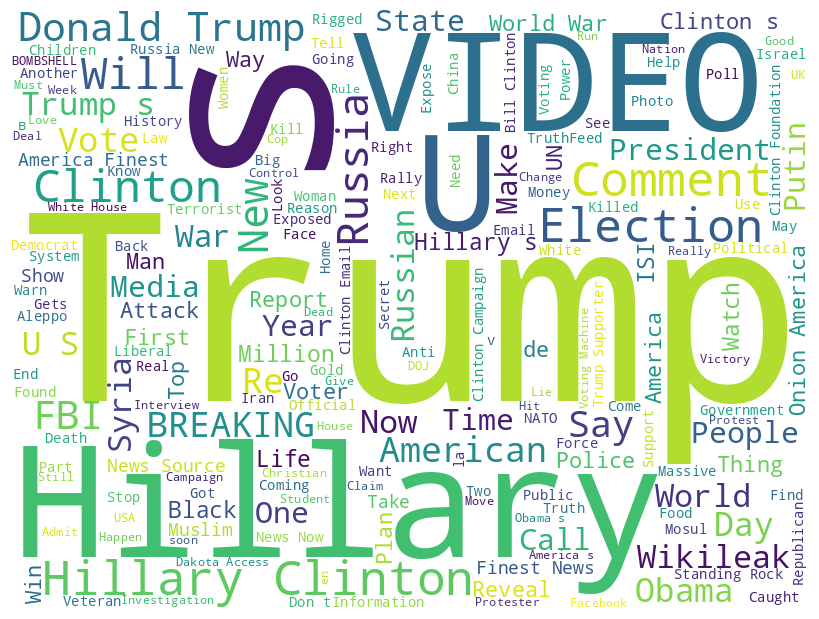

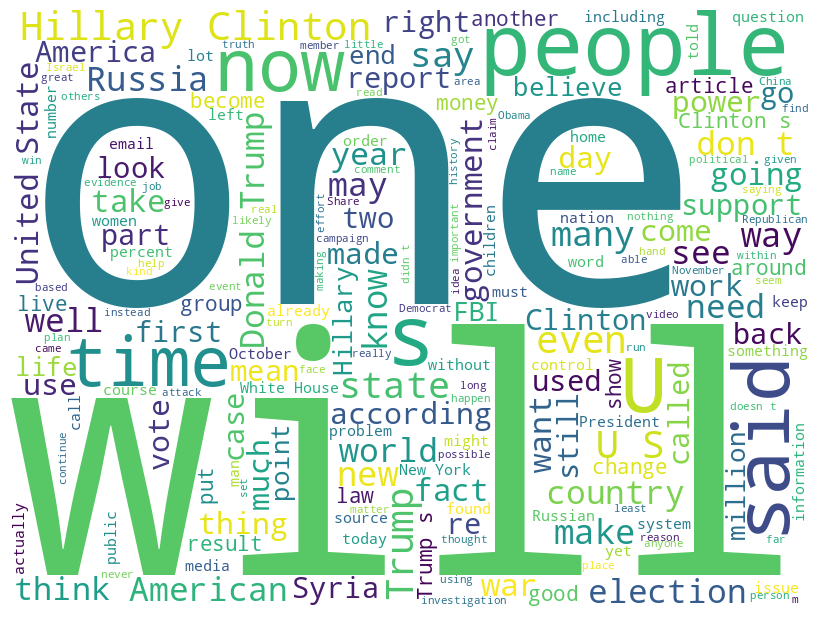

In [42]:
plot_wordcloud(fake_title)
plot_wordcloud(fake_text)